In [1]:
import pandas as pd

import tensorflow as tf


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2024-04-22 01:47:42.712743: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 01:47:42.716674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 01:47:42.768658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 01:47:42.769937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 01:47:43.693068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv("digits_8K (1).csv")

train_images = df.iloc[:8000, 1:]  
train_labels = df.iloc[:8000, 0]

test_images = df.iloc[6428:, 1:]  # 20 percent of the data is for training.
test_labels = df.iloc[6428:, 0]

# https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor
train_images = tf.convert_to_tensor(train_images, dtype=tf.float32)
test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)


train_images = tf.reshape(train_images, [train_images.shape[0], 28, 28])
test_images = tf.reshape(test_images, [test_images.shape[0], 28, 28])

train_images_shape = tf.shape(train_images)
test_images_shape = tf.shape(test_images)

In [3]:
test_images

<tf.Tensor: shape=(1608, 28, 28), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.

In [4]:
# digits_mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()
# digits_mnist

In [5]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [6]:
len(train_labels+test_labels)

8036

In [7]:
train_images.shape

TensorShape([8000, 28, 28])

In [8]:
test_images.shape

TensorShape([1608, 28, 28])

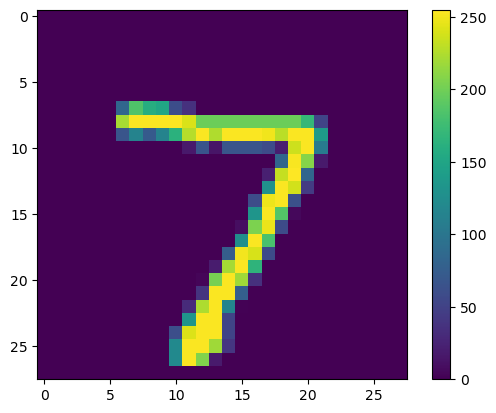

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # flatten is multiplying the 28 by 28 to one input layer = 784
    tf.keras.layers.Dense(128, activation='relu'), # 
    tf.keras.layers.Dense(10)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Standardize
train_images =train_images / 255

test_images = test_images / 255

In [13]:
# Compile
# https://www.tensorflow.org/api_docs/python/tf
model.compile(optimizer='adam', # trying gradient descent for experimentation! - loss of 7 percent to the accuracy reading.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# Train
print(type(train_images))
training_history = model.fit(train_images, train_labels, epochs=10) # was at 99.98% with 10 epochs, experimentation. 15 doesn't change much so it will stay as 10

<class 'tensorflow.python.framework.ops.EagerTensor'>
Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5790 - accuracy: 0.8390
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.9285
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1932 - accuracy: 0.9426
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9570
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9682
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9768
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9826
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0528 - accuracy: 0.9885
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9902
Epoch 10/10
250/250 [=========================

In [15]:
print(training_history.history['loss'])

[0.5789621472358704, 0.2589198350906372, 0.1932486742734909, 0.1460779309272766, 0.11215824633836746, 0.08824464678764343, 0.06652995944023132, 0.05277830362319946, 0.04139479249715805, 0.03172243386507034]


In [16]:
# It is so cool to watch the epochs increase the accuracy as progress is made. It is like I am watching the machine learn in real time.

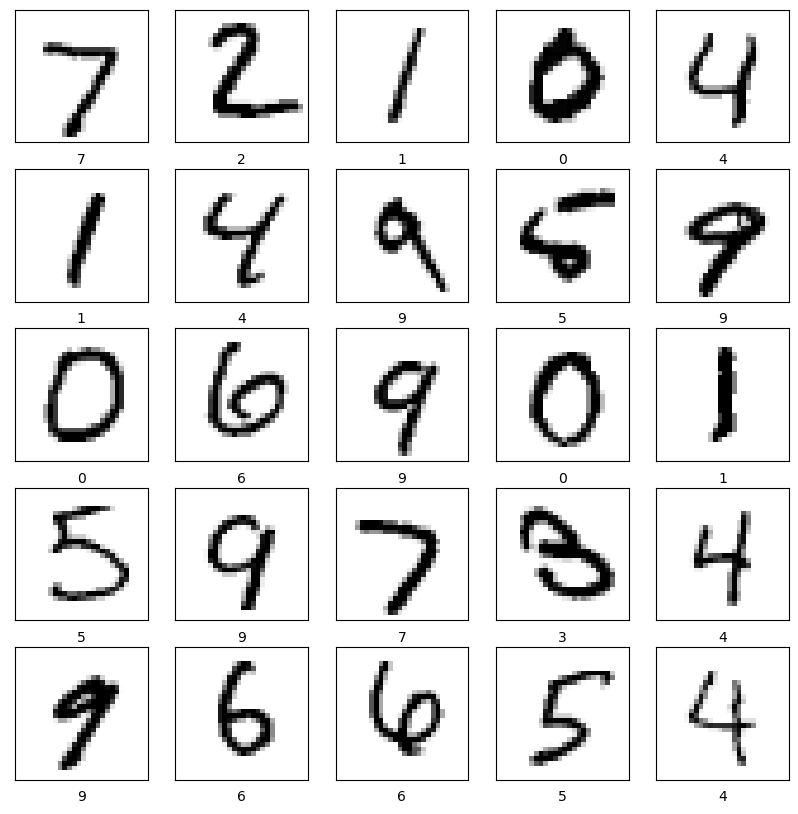

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

51/51 - 0s - loss: 0.0172 - accuracy: 0.9975 - 205ms/epoch - 4ms/step

Test accuracy: 0.9975124597549438


In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

51/51 [==============================] - 0s 1ms/step


In [21]:
predictions[0]

array([9.9943632e-01, 2.3152718e-09, 2.4728643e-04, 2.1838248e-10,
       7.1819306e-07, 1.0993196e-05, 3.0005240e-04, 2.1429300e-06,
       2.3749230e-06, 3.1628591e-08], dtype=float32)

In [22]:
test_labels = test_labels.reset_index(drop=True)

In [23]:
np.argmax(predictions[0]) # use this for confusion matrix

0

In [24]:
test_labels[0]

0

In [25]:
print(test_labels.iloc[0]) # before I reset my index, this was experimentation because the code provided wasn't working.

0


In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

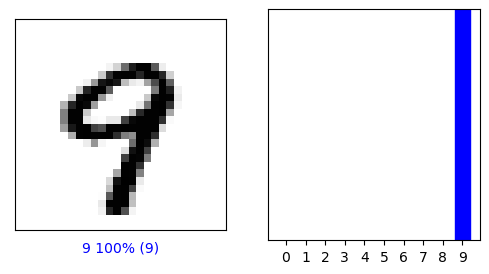

In [27]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[5]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 28ms/step
[[3.6232908e-07 4.1999768e-09 2.6271735e-07 4.2659160e-08 9.9996018e-01
  4.5852423e-07 3.6007623e-05 8.6565245e-07 1.7948774e-07 1.6001014e-06]]


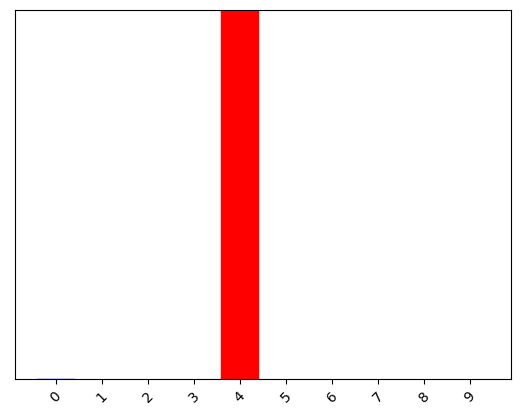

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

4

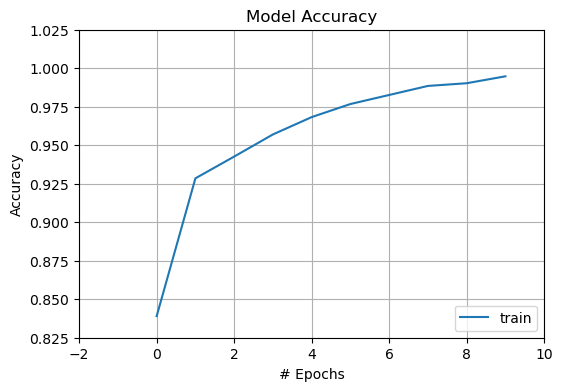

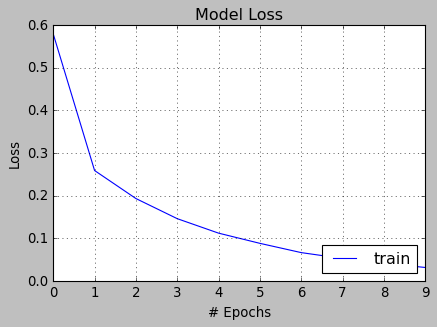

In [33]:
epoch = len(training_history.history.get('loss',[]))

# Draw Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('accuracy'))
#plt.plot(range(epoch),training_history.history.get('val_acc'))
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])

# Draw Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('loss'))
#plt.plot(range(epoch),training_history.history.get('val_loss'))
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'], loc=4)
plt.style.use(['classic'])